In [1]:
import pandas as pd
df = pd.read_csv('F-F_Research_Data_Factors_weekly_CSV.csv', index_col=0)
df.head()

,Mkt-RF,SMB,HML,RF
Date,,,,
19260702,1.60,-0.62,-0.83,0.056
19260710,0.36,-0.88,0.31,0.056
19260717,1.01,0.59,-1.44,0.056
19260724,-2.05,0.10,-0.18,0.056
19260731,3.04,-1.82,-0.90,0.056


In [2]:
df = df[['Mkt-RF', 'SMB', 'HML']]
name_dict = {'Mkt-RF':'Market Factor (MER)',
            'SMB':'Size Factor (SMB)',
            'HML':'Value Factor (HML)'}

In [3]:
df.columns = [name_dict[i] for i in df.columns]
df.index = df.index.astype(str)
df.index = pd.to_datetime(df.index, format='%Y%m%d')

In [4]:
import pandas as pd
BRK = pd.read_csv('BRKa历史数据.csv', index_col=0)
BRK = BRK.sort_index()
BRK.index = pd.to_datetime(BRK.index, format='%Y-%m-%d')
BRK.head()

,收盘,开盘,高,低,交易量,涨跌幅
日期,,,,,,
2010-01-11,"99,999","100,100","100,750","99,320",1.95K,-0.30%
2010-01-12,"99,350","99,505","99,949","99,350",2.23K,-0.65%
2010-01-13,"99,150","99,400","99,949","99,150",1.02K,-0.20%
2010-01-14,"99,000","99,160","99,480","98,920",1.43K,-0.15%
2010-01-15,"97,500","99,000","99,363","97,205",2.66K,-1.52%


In [5]:
import numpy as np
BRK['收盘'] = np.array([i.replace(',', '') for i in BRK['收盘']], dtype='float')

<AxesSubplot:title={'center':'伯克希尔哈撒韦公司的股价'}, xlabel='日期'>

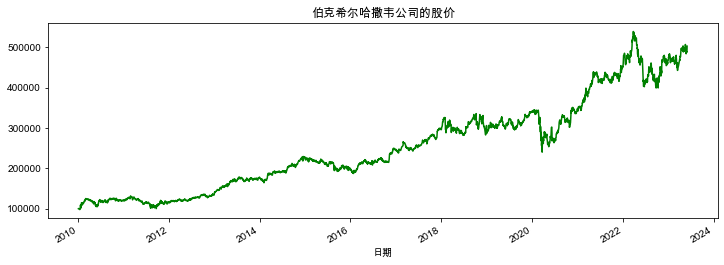

In [7]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = ['Arial Unicode MS'] 
plt.rcParams['axes.unicode_minus'] = False
BRK['收盘'].plot(figsize=(12,4), title='伯克希尔哈撒韦公司的股价', color='green')

,Market Factor (MER),Size Factor (SMB),Value Factor (HML),Return
Date,,,,
2010-01-08,2.89,0.21,3.92,-0.124782
2010-01-15,-0.91,0.10,-1.53,-0.124782
2010-01-22,-3.57,0.91,-1.88,0.060606
2010-01-29,-1.70,-0.71,0.09,0.091429
2010-02-05,-0.81,-0.71,-0.07,-0.079498


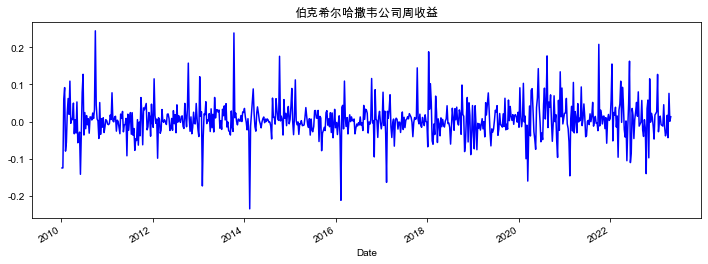

In [8]:
import matplotlib.pyplot as plt
BRK_close= BRK['收盘']
BRK_shift_5 = BRK['收盘'].shift(5)
df['Return'] = BRK_close/BRK_shift_5 - 1
df['Return'] = df['Return'].fillna(method='ffill') #forward fill向前填充，过去的数据填充今天的
df = df.loc[df.index>pd.to_datetime('2010-01-01'), :]
df['Return'].plot(figsize=(12,4), title='伯克希尔哈撒韦公司周收益', color='blue')
df.head()

<AxesSubplot:>

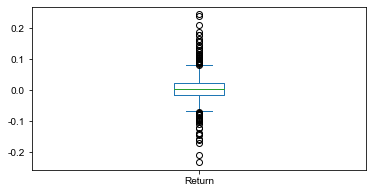

In [9]:
df['Return'].plot(kind='box', grid=False, figsize=(6,3))

<AxesSubplot:>

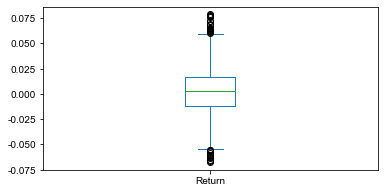

In [10]:
import numpy as np
QU = df['Return'].quantile(0.75)
QL = df['Return'].quantile(0.25)
IQR = QU - QL
df['Return'][(df['Return']>(QU + 1.5*IQR)) | (df['Return']<(QL-1.5*IQR))] = np.nan
df.loc[:, 'Return'] = df['Return'].fillna(df['Return'].quantile(0.5))
df['Return'].plot(kind='box', grid=False, figsize=(6,3))

<AxesSubplot:>

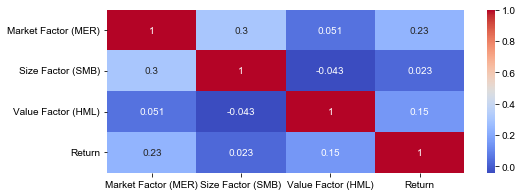

In [11]:
import seaborn as sns
plt.figure(figsize=(8,3))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm')

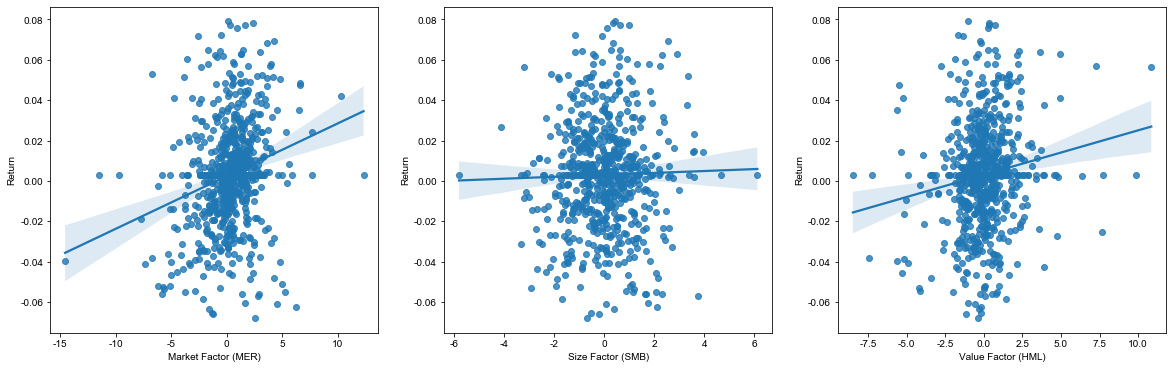

In [12]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
for i, k in enumerate(['Market Factor (MER)', 'Size Factor (SMB)', 'Value Factor (HML)']):
    sns.regplot(y=df['Return'], x=df[k], ax=axs[i])

In [13]:
import statsmodels.api as sm
df['Intercept'] = 1
model=sm.OLS(df['Return'],
             df[['Intercept', 'Market Factor (MER)', 'Size Factor (SMB)', 'Value Factor (HML)']])
result=model.fit()
result.summary(alpha=0.05)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Return   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     18.67
Date:                Tue, 20 Jun 2023   Prob (F-statistic):           1.18e-11
Time:                        15:54:29   Log-Likelihood:                 1564.2
No. Observations:                 695   AIC:                            -3120.
Df Residuals:                     691   BIC:                            -3102.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.0024      0.001      2.462      0.014       0.000       0.004
Market Factor (MER)     0.0027      0.000      6.249      0.000       0.002       0.004
Size Factor (SMB)      -0.0009      0.001     -1.126      0.260      -0.002       0.001
Value Factor (HML)      0.0020      0.001      3.643      0.000       0.001       0.003
==============================================================================
Omnibus:                       10.948   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               15.520
Skew:                           0.137   Prob(JB):                     0.000426
Kurtosis:                       3.679   Cond. No.                         2.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
x = df[['Market Factor (MER)', 'Size Factor (SMB)', 'Value Factor (HML)']]
y = df['Return']
beta=pd.DataFrame([result.params[0:]], columns=x.columns[0:])
regression_results=pd.DataFrame(columns=['Period', 'alpha', 'lambda'])

In [18]:
beta

,Market Factor (MER),Size Factor (SMB),Value Factor (HML)
0,0.002677,-0.000894,0.001992


In [14]:
df.reset_index(inplace=True)

In [19]:
for period in df['Date'].unique():
    period_data=df[df['Date']==period]
    y1=period_data['Return'].values
    x1=sm.add_constant(beta.values)
    # 截面回归
    model_cs=sm.OLS(y1, x1)
    results_cs=model_cs.fit()
    coefficients=results_cs.params
    regression_results=regression_results.append({'Period': period,
                                                    'alpha': coefficients[0],
                                                    'lambda': coefficients[1]},
                                                   ignore_index=True)

/var/folders/p0/l8v6czxj53qgrwrn1hxh70cr0000gn/T/ipykernel_27075/3746931838.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regression_results=regression_results.append({'Period': period,
/var/folders/p0/l8v6czxj53qgrwrn1hxh70cr0000gn/T/ipykernel_27075/3746931838.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regression_results=regression_results.append({'Period': period,
/var/folders/p0/l8v6czxj53qgrwrn1hxh70cr0000gn/T/ipykernel_27075/3746931838.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  regression_results=regression_results.append({'Period': period,
/var/folders/p0/l8v6czxj53qgrwrn1hxh70cr0000gn/T/ipykernel_27075/3746931838.py:9: FutureWarning: The frame.append method is deprecated and will be removed fr

In [20]:
regression_results

,Period,alpha,lambda
0,2010-01-08 00:00:00,0.658531,-0.219961
1,2010-01-15 00:00:00,0.658531,-0.219961
2,2010-01-22 00:00:00,13.59451,-4.540803
3,2010-01-29 00:00:00,0.658531,-0.219961
4,2010-02-05 00:00:00,0.658531,-0.219961
...,...,...,...
690,2023-03-31 00:00:00,3.81182,-1.273214
691,2023-04-06 00:00:00,-9.738629,3.252872
692,2023-04-14 00:00:00,17.014295,-5.683071
693,2023-04-21 00:00:00,0.183156,-0.061177


<AxesSubplot:>

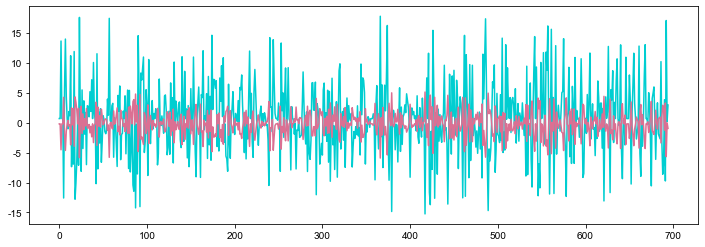

In [21]:
regression_results['alpha'].plot(figsize=(12,4), color='darkturquoise')
regression_results['lambda'].plot(figsize=(12,4),color='palevioletred')

In [22]:
regression_results['alpha'].mean()

0.6712419650873567

In [23]:
regression_results['lambda'].mean()

-0.2242065094766676